In [ ]:
# Libraries used

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import file

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [46]:
# Basic information
print("Dataset Overview:")
print(df.head())
print(df.info())
print(df.describe())

Dataset Overview:
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        0                 2          0              0            94   
1        1                 0          1              1            39   
2        2                 3          0              0            89   
3        3                 3          0              0            80   
4        4                 5          1              1            96   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0          296          5          478                        25   
1          119          3          117                        28   
2          294          9          206                        72   
3          304          3          167                       183   
4          239          9           82                       125   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                      175                  224            

In [4]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower()

In [5]:
# Verify column names
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [6]:
# Identify the target column
possible_target_columns = ['loan_status', 'loan_approval_status']
target_column = None
for col in possible_target_columns:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    raise KeyError("Target column not found in dataset! Available columns: " + str(df.columns))

In [7]:
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)

In [8]:

# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
# Feature-target split
X = df.drop(columns=[target_column])
y = df[target_column]

In [10]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[528   8]
 [  9 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



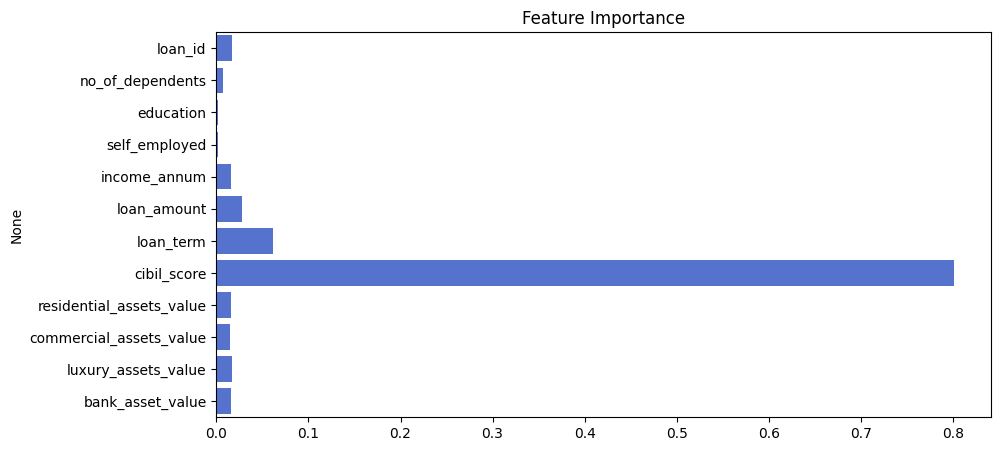

In [38]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names, color='royalblue')
plt.title("Feature Importance")
plt.show()

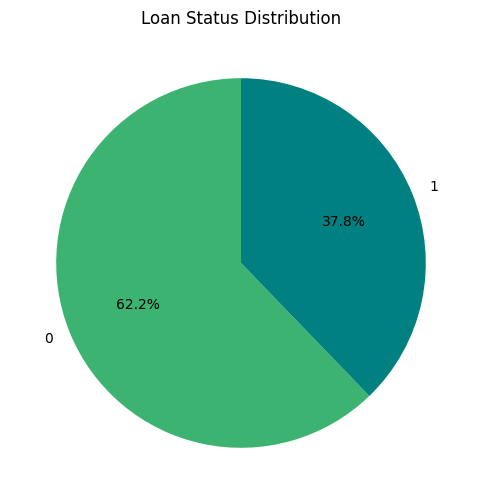

In [39]:
# Loan Status Distribution
plt.figure(figsize=(6, 6))
df[target_column].value_counts().plot.pie(autopct='%1.1f%%', colors=['mediumseagreen', 'teal'], startangle=90)
plt.title("Loan Status Distribution")
plt.ylabel('')
plt.show()

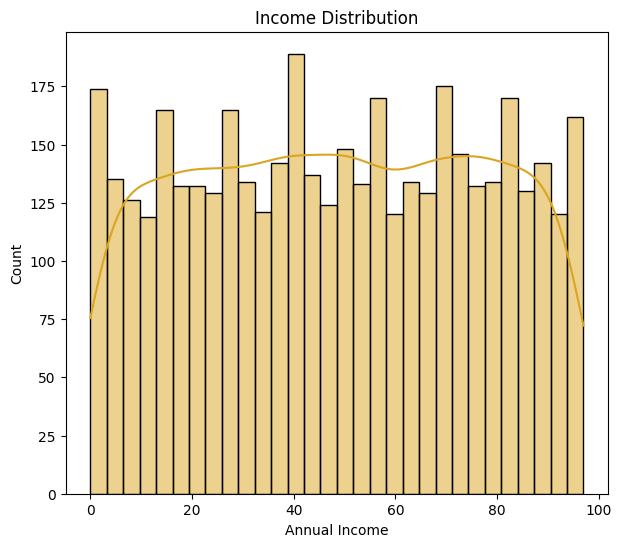

In [45]:
# Income Distribution
plt.figure(figsize=(7, 6))
sns.histplot(df['income_annum'], bins=30, kde=True, color='goldenrod')
plt.title("Income Distribution")
plt.xlabel("Annual Income")
plt.show()

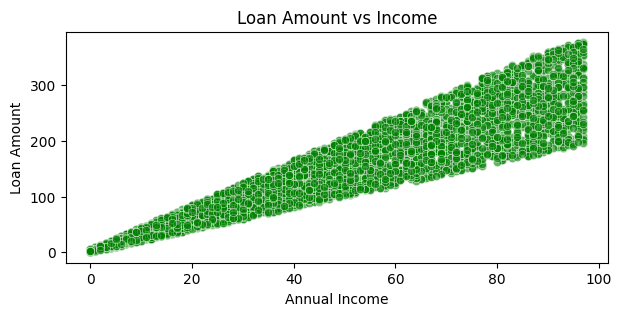

In [25]:
# Loan Amount vs Income
plt.figure(figsize=(7, 3))
sns.scatterplot(x=df['income_annum'], y=df['loan_amount'], color="green", alpha=0.6)
plt.title("Loan Amount vs Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

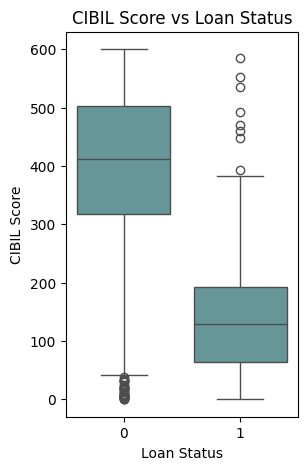

In [44]:
# CIBIL Score vs Loan Status
plt.figure(figsize=(3, 5))
sns.boxplot(x=df[target_column], y=df['cibil_score'], color="cadetblue")
plt.title("CIBIL Score vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()